# Import modules

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics 


# Data Pre-Processing
First, let's load the dataset and add a binary affair column.

In [55]:
# load dataset
df = sm.datasets.fair.load_pandas().data
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [56]:
# add "affair" column: 1 represents having affairs, 0 represents not
df['affairs'] = (df.affairs > 0).astype(int)
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1


# Data Exploration

In [57]:
print(df.describe().T)
print(df.info())
print(df.isnull().sum())


                  count       mean       std   min   25%   50%   75%   max
rate_marriage    6366.0   4.109645  0.961430   1.0   4.0   4.0   5.0   5.0
age              6366.0  29.082862  6.847882  17.5  22.0  27.0  32.0  42.0
yrs_married      6366.0   9.009425  7.280120   0.5   2.5   6.0  16.5  23.0
children         6366.0   1.396874  1.433471   0.0   0.0   1.0   2.0   5.5
religious        6366.0   2.426170  0.878369   1.0   2.0   2.0   3.0   4.0
educ             6366.0  14.209865  2.178003   9.0  12.0  14.0  16.0  20.0
occupation       6366.0   3.424128  0.942399   1.0   3.0   3.0   4.0   6.0
occupation_husb  6366.0   3.850141  1.346435   1.0   3.0   4.0   5.0   6.0
affairs          6366.0   0.322495  0.467468   0.0   0.0   0.0   1.0   1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   a

In [58]:
# Average of all features group by affair
df.groupby('affairs').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb
affairs,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559


We can see that on average, women who have affairs rate their marriages lower, which is to be expected. Let's take another look at the rate_marriage variable.

In [59]:
df.affairs.value_counts()

0    4313
1    2053
Name: affairs, dtype: int64

In [60]:
df.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
rate_marriage,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.181446


An increase in age, yrs_married, and children appears to correlate with a declining marriage rating.

# Data Visualization

In [61]:
# show plots in the notebook
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000273959EA448>,
      dtype=object)

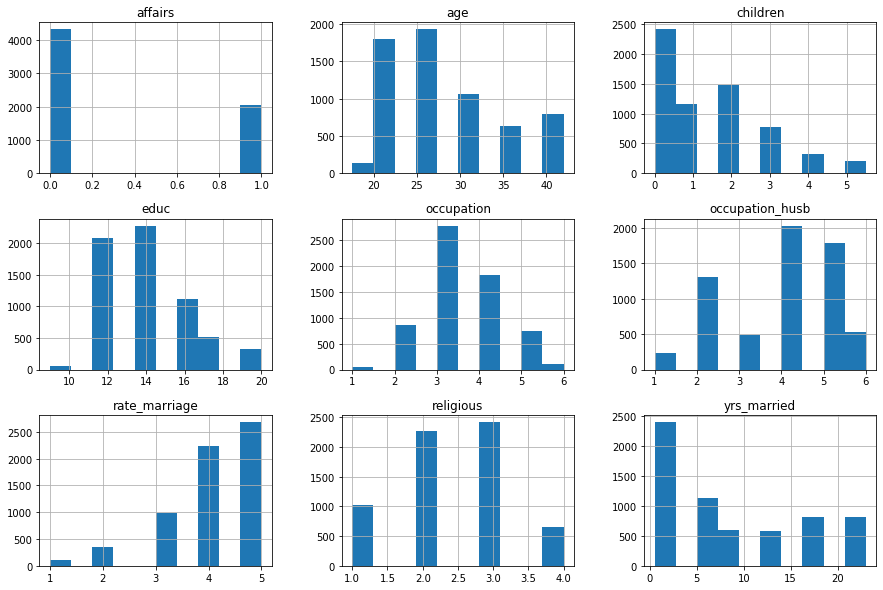

In [62]:
# histogram of education
df.hist(figsize=(15,10))

Text(0, 0.5, 'Percentage')

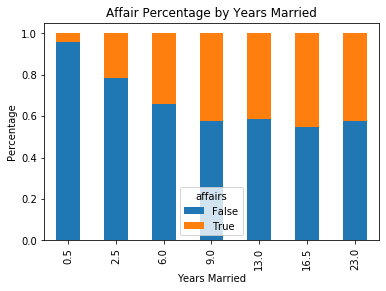

In [63]:
affair_yrs_married = pd.crosstab(df.yrs_married, df.affairs.astype(bool))
affair_yrs_married.div(affair_yrs_married.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Affair Percentage by Years Married')
plt.xlabel('Years Married')
plt.ylabel('Percentage')


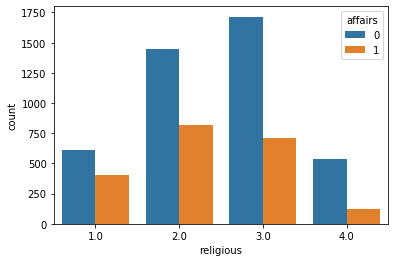

In [64]:
sns.countplot("religious",hue="affairs",data=df)

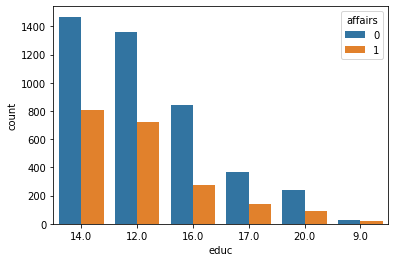

In [65]:
sns.countplot("educ",hue="affairs",data=df,order=df["educ"].value_counts().index)

we can say large bunch of women is satisfied with their married life irrespective of their affairs.
Women who is doing white collar jobs having less chance of affair and women with graduation and higher educational background also has less chance of affair but for those women who is in college and have lower literacy has shown more interest in extra marital affairs.



# Prepare Data for Logistic Regression
To prepare the data, I want to add an intercept column as well as dummy variables for occupation and occupation_husb, since I'm treating them as categorial variables. The dmatrices function from the patsy module can do that using formula language.

In [66]:
# create dataframes with an intercept column and dummy variables for occupation and occupation_husb
y, X = dmatrices('affairs ~ rate_marriage + age + yrs_married + children + \
                  religious + educ + C(occupation) + C(occupation_husb)',
                  df, return_type="dataframe")
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

The column names for the dummy variables are ugly, so let's rename those.

In [67]:
# fix column names of X
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})

In [68]:
df=pd.concat([X,y],axis=1)
df.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0


In [72]:
df.drop('affairs', axis=1).columns.values

array(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6',
       'occ_husb_2', 'occ_husb_3', 'occ_husb_4', 'occ_husb_5',
       'occ_husb_6', 'rate_marriage', 'age', 'yrs_married', 'children',
       'religious', 'educ'], dtype=object)

In [17]:
# Lets do the OVERSAMPLING

In [80]:
from imblearn.over_sampling import RandomOverSampler
rdm=RandomOverSampler()
X,y=rdm.fit_sample(X,y)


C:\Users\inite\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\inite\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [81]:
X= pd.DataFrame(X, columns= df.drop('affairs', axis=1).columns.values )
y= pd.DataFrame(y, columns = ['affairs'])
type(X)
type(y)

pandas.core.frame.DataFrame

In [82]:
df=pd.concat([X,y],axis=1)

In [83]:
df.head()

,Intercept,occ_2,occ_3,occ_4,occ_5,occ_6,occ_husb_2,occ_husb_3,occ_husb_4,occ_husb_5,occ_husb_6,rate_marriage,age,yrs_married,children,religious,educ,affairs
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,32.0,9.0,3.0,3.0,17.0,1.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,27.0,13.0,3.0,1.0,14.0,1.0
2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,22.0,2.5,0.0,1.0,16.0,1.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,37.0,16.5,4.0,3.0,16.0,1.0
4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,27.0,9.0,1.0,1.0,14.0,1.0


In [85]:
df.affairs.value_counts()

0.0    4313
1.0    4313
Name: affairs, dtype: int64

# Logistic Regression
Let's go ahead and run logistic regression on the entire data set, and see how accurate it is!

In [97]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

In [98]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression()
model = model.fit(x_train,y_train)

# check the accuracy on the training set
model.score(x_train,y_train)

C:\Users\inite\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\inite\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.6852173913043478

In [101]:
# examine the coefficients
X.columns, np.transpose(model.coef_)

(Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
        'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
        'age', 'yrs_married', 'children', 'religious', 'educ'],
       dtype='object'),
 array([[ 1.72252144],
        [ 0.22116475],
        [ 0.41618688],
        [ 0.19548198],
        [ 0.79980396],
        [ 0.48395952],
        [ 0.34554538],
        [ 0.40550433],
        [ 0.20140485],
        [ 0.29204557],
        [ 0.41294574],
        [-0.70291508],
        [-0.05063611],
        [ 0.10245975],
        [ 0.02852405],
        [-0.37863435],
        [ 0.00436965]]))

Increases in marriage rating and religiousness correspond to a decrease in the likelihood of having an affair. For both, wife's occupation and the husband's occupation, the lowest likelihood of having an affair corresponds to the baseline occupation (student), since all of the dummy coefficients are positive.

In [103]:
# predict class labels for the test set
predicted = model.predict(x_test)
predicted

array([0., 0., 1., ..., 1., 0., 1.])

In [104]:
# generate class probabilities
probs = model.predict_proba(x_test)
probs

array([[0.56289834, 0.43710166],
       [0.53312235, 0.46687765],
       [0.35044919, 0.64955081],
       ...,
       [0.41265779, 0.58734221],
       [0.58638017, 0.41361983],
       [0.47801364, 0.52198636]])

As you can see, the classifier is predicting a 1 (having an affair) any time the probability in the second column is greater than 0.5.

Now let's generate some evaluation metrics.

In [105]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.6743916570104287
0.7333073632034603


The accuracy is 67%, which is the same as we experienced when training and predicting on the same data.

We can also see the confusion matrix and a classification report with other metrics.

In [115]:
conf_mat= metrics.confusion_matrix(y_test, predicted)
print(conf_mat)
print(metrics.classification_report(y_test, predicted))

[[602 279]
 [283 562]]
              precision    recall  f1-score   support

         0.0       0.68      0.68      0.68       881
         1.0       0.67      0.67      0.67       845

    accuracy                           0.67      1726
   macro avg       0.67      0.67      0.67      1726
weighted avg       0.67      0.67      0.67      1726



In [117]:
# Area Under Curve
auc = metrics.roc_auc_score(y_test, predicted)
auc

0.6742015864167266

In [118]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, predicted)

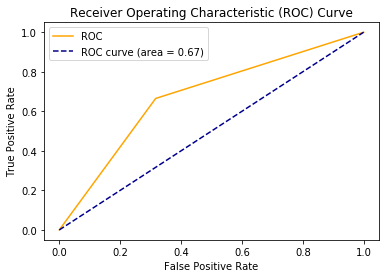

In [120]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Model Evaluation Using Cross-Validation
Now let's try 10-fold cross-validation, to see if the accuracy holds up more rigorously.

In [107]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(), X, y, scoring='accuracy', cv=10)
scores, scores.mean()

C:\Users\inite\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\inite\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\inite\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example u

(array([0.67207416, 0.68366165, 0.68829664, 0.68713789, 0.67091541,
        0.68945539, 0.69605568, 0.6450116 , 0.68329466, 0.67517401]),
 0.6791077098450611)

Looks good. It's still performing at 67% accuracy.

# Predicting the Probability of an Affair
Just for fun, let's predict the probability of an affair for a random woman not present in the dataset. She's a 25-year-old teacher who graduated from college, has been married for 3 years. She has 1 child, rates herself as strongly religious, rates her marriage as fair, and her husband is a farmer.

In [108]:
model.predict_proba(np.array([[1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 3, 25, 3, 1, 4, 16]]))

array([[0.60998908, 0.39001092]])

The predicted probability of an affair is 39%.